# Programming Assignment #1

Download the following text file:

IntegerArray.txt

This file contains all of the 100,000 integers between 1 and 100,000 (inclusive) in some order, with no integer repeated.

Your task is to compute the number of inversions in the file given, where the i^{th}i 
th
  row of the file indicates the i^{th}i 
th
  entry of an array.

Because of the large size of this array, you should implement the fast divide-and-conquer algorithm covered in the video lectures.

The numeric answer for the given input file should be typed in the space below.

So if your answer is 1198233847, then just type 1198233847 in the space provided without any space / commas / any other punctuation marks. You can make up to 5 attempts, and we'll use the best one for grading.

(We do not require you to submit your code, so feel free to use any programming language you want --- just type the final numeric answer in the following space.)

[TIP: before submitting, first test the correctness of your program on some small test files or your own devising. Then post your best test cases to the discussion forums to help your fellow students!]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use("ggplot")

%matplotlib inline

In [82]:
X = np.random.rand(1000000)

## Brute Force Function

In [75]:
def bf_inversion_count(array):
    count = 0
    for i in range(len(array)):
        j = i + 1
        while j < len(array):
            if array[i] > array[j]:
                count +=1
            j += 1
    return count           

In [83]:
bf_inversion_count(X)

KeyboardInterrupt: 

## Divide Conquer Function

In [112]:
def dc_inversion_count(array):
    
    length = len(array)
    
    if length == 2:
        if array[0] > array[1]:
            return np.array([array[1], array[0]]), 1
        else:
            return array, 0
    
    elif length > 2:
        array_l = array[:int(length/2)]
        array_r = array[int(length/2):]
        array_l_df = dc_inversion_count(array_l)
        array_r_df = dc_inversion_count(array_r)
        array_l_sorted = array_l_df[0]
        array_r_sorted = array_r_df[0]
        count = array_l_df[1] + array_r_df[1]

        l = 0
        r = 0
        
        sorted_list = []
        
        for i in range(length):
            if r == int(length/2):
                sorted_list.append(array_l_sorted[l])
                l += 1

            elif l == int(length/2):
                sorted_list.append(array_r_sorted[r])
                r += 1             
                
            elif array_l_sorted[l] > array_r_sorted[r]:
                sorted_list.append(array_r_sorted[r])
                r += 1
                count += len(array_l_sorted) - l
                
            elif array_l_sorted[l] < array_r_sorted[r]:
                sorted_list.append(array_l_sorted[l])
                l += 1
        
        return np.array(sorted_list), count

In [113]:
dc_inversion_count(X)[1]

TypeError: 'NoneType' object is not subscriptable

## Performance Check

In [114]:
time_list = []
for i in range(2, 15):
    Z = np.random.rand(2**i)
    
    start_time = time.time()
    bf_inversion_count(Z)
    brute = time.time() - start_time

    start_time = time.time()
    dc_inversion_count(Z)
    divide_conquer = time.time() - start_time
    
    time_list.append([brute, divide_conquer])
    print("i={}: completed".format(i))

i=2: completed
i=3: completed
i=4: completed
i=5: completed
i=6: completed
i=7: completed
i=8: completed
i=9: completed
i=10: completed
i=11: completed
i=12: completed
i=13: completed
i=14: completed


In [115]:
time_list

[[1.6689300537109375e-05, 5.0067901611328125e-05],
 [3.0994415283203125e-05, 0.00010800361633300781],
 [0.00011515617370605469, 0.00022101402282714844],
 [0.00041985511779785156, 0.0005738735198974609],
 [0.0012540817260742188, 0.0006701946258544922],
 [0.006844997406005859, 0.0015430450439453125],
 [0.019453048706054688, 0.006136894226074219],
 [0.09903979301452637, 0.007658958435058594],
 [0.32827091217041016, 0.018922090530395508],
 [1.165518045425415, 0.0385279655456543],
 [4.728311777114868, 0.08163213729858398],
 [18.9978768825531, 0.19759202003479004],
 [74.68673706054688, 0.3700730800628662]]

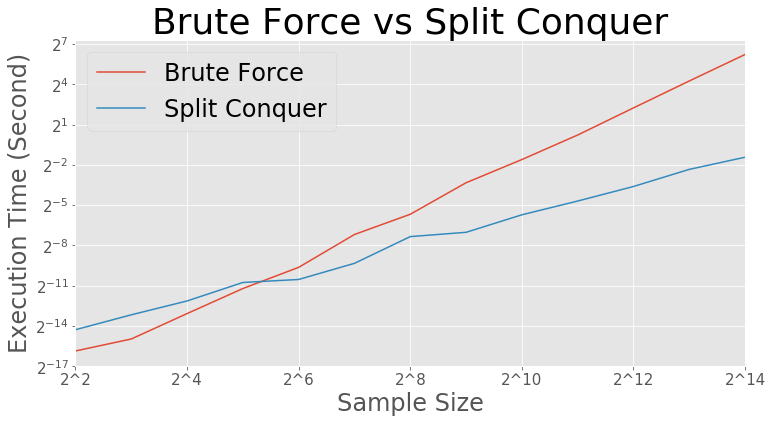

In [119]:
time_df = pd.DataFrame(time_list, index=range(2, 15), columns=["brute_force", "split_conquer"])
time_df.plot(figsize=(12, 6))

plt.title("Brute Force vs Split Conquer", fontsize=36)
plt.legend(["Brute Force", "Split Conquer"], fontsize=24)
plt.xlabel("Sample Size", fontsize = 24)
plt.xticks(np.arange(2, 15, 2), labels = ["2^{}".format(i) for i in range(2, 15, 2)], fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log", basey=2)
plt.ylabel("Execution Time (Second)", fontsize = 24)
plt.savefig("image/inversion_count.png")
plt.show()

In [124]:
result = 1
for i in range(1, 28):
    result *= (366-i)/365
    print(i, result)

1 1.0
2 0.9972602739726028
3 0.9917958341152187
4 0.9836440875334498
5 0.9728644263002065
6 0.9595375163508886
7 0.9437642969040246
8 0.925664707648331
9 0.9053761661108333
10 0.8830518222889223
11 0.8588586216782669
12 0.8329752111619355
13 0.8055897247675705
14 0.7768974879950269
15 0.7470986802363135
16 0.7163959947471499
17 0.6849923347034391
18 0.6530885821282104
19 0.620881473968463
20 0.5885616164194197
21 0.556311664834794
22 0.5243046923374497
23 0.4927027656760144
24 0.46165574208547105
25 0.431300296030536
26 0.4017591798640609
27 0.37314071773675794
